<a href="https://colab.research.google.com/github/riskydevandra/soft_computing_praktik/blob/main/m10_nndl_k_saintdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Data

In [ ]:
import pandas as pd

In [ ]:
ionosphere = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Perceptron/Dataset/ionosphere.data', header=None)

## Ganti Nama Atribut

In [ ]:
ionosphere.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34],
           dtype='int64')

In [ ]:
ionosphere.columns = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
                      10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                      20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                      30, 31, 32, 33, 'Class']

## Exploratory & Data Preprocessing

In [ ]:
ionosphere.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22

In [ ]:
print(f'Jumlah data duplikat: {ionosphere.duplicated().sum()}')

Jumlah data duplikat: 0


In [ ]:
ionosphere = ionosphere.drop_duplicates()

In [ ]:
ionosphere.iloc[:5,:18]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780


In [ ]:
ionosphere.iloc[:,:18].describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,350.000000,350.0,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,0.894286,0.0,0.643174,0.044499,0.602785,0.116220,0.551667,0.119701,0.513311,0.181864,0.477543,0.155483,0.401946,0.093681,0.345142,0.071336,0.383040,-0.003627
std,0.307912,0.0,0.497234,0.442060,0.519608,0.461428,0.492477,0.521456,0.507050,0.484446,0.563725,0.495456,0.622706,0.495556,0.653502,0.459011,0.618566,0.497473
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.473448,-0.065388,0.415473,-0.024868,0.219745,-0.055235,0.093298,-0.049003,0.027873,-0.065677,0.000000,-0.074152,0.000000,-0.082973,0.000000,-0.226480
50%,1.000000,0.0,0.873445,0.016700,0.811145,0.022930,0.729315,0.015085,0.686450,0.020665,0.670560,0.029750,0.645660,0.030500,0.603650,0.000000,0.593375,0.000000
75%,1.000000,0.0,1.000000,0.194727,1.000000,0.335317,0.970445,0.451572,0.954185,0.536192,0.958157,0.483613,0.956078,0.375625,0.919475,0.311682,0.936168,0.195467
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
ionosphere.iloc[:5,18:]

,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,Class
0,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
ionosphere.iloc[:,18:].describe()

,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,0.360416,-0.024093,0.337657,0.008320,0.363511,-0.057570,0.397266,-0.071390,0.540331,-0.066879,0.379526,-0.027987,0.353521,-0.003805,0.350362,0.014521
std,0.626867,0.519818,0.610435,0.518908,0.604320,0.528202,0.578890,0.509208,0.516359,0.548550,0.576353,0.508699,0.571989,0.514310,0.523076,0.469007
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,-0.237420,0.000000,-0.246935,0.000000,-0.371657,0.000000,-0.332860,0.283612,-0.428992,0.000000,-0.237083,0.000000,-0.242993,0.000000,-0.166810
50%,0.579155,0.000000,0.501865,0.000000,0.532110,0.000000,0.555330,-0.015200,0.703345,-0.017685,0.499215,0.000000,0.446875,0.000000,0.413115,0.000000
75%,0.900317,0.136720,0.896813,0.188820,0.912933,0.164895,0.907165,0.157922,0.999522,0.154862,0.884572,0.154218,0.859490,0.200935,0.816778,0.172105
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
ionosphere = ionosphere.drop([1], axis=1)

In [ ]:
ionosphere.iloc[:5,0:5]

,0,2,3,4,5
0,1,0.99539,-0.05889,0.85243,0.02306
1,1,1.00000,-0.18829,0.93035,-0.36156
2,1,1.00000,-0.03365,1.00000,0.00485
3,1,1.00000,-0.45161,1.00000,1.00000
4,1,1.00000,-0.02401,0.94140,0.06531


In [ ]:
ionosphere['Class'].value_counts()

g    225
b    125
Name: Class, dtype: int64

In [ ]:
class_fr = ionosphere['Class'].value_counts().rename_axis('Label').reset_index(name='Jumlah')
class_fr

,Label,Jumlah
0,g,225
1,b,125


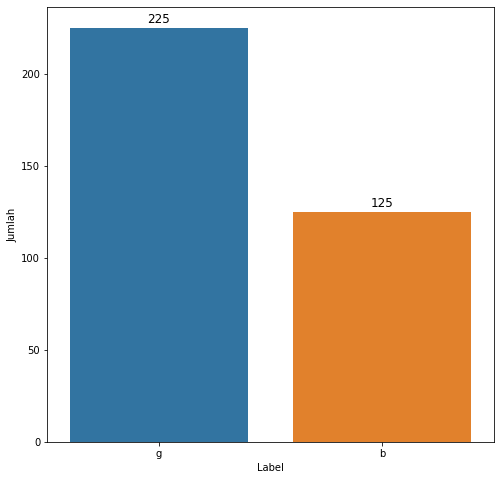

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the plot size
plt.figure(figsize=(8, 8))

plots = sns.barplot(x="Label", y="Jumlah", data=class_fr)

# # Iterrating over the bars one-by-one
for bar in plots.patches:
    # print('get height: ',bar.get_height())
    # print('get x: ',bar.get_x())
    # print('get width: ', bar.get_width())
    # print(f'x-coordinate: {bar.get_x() + bar.get_width() / 2}\n')
    
    plots.annotate(format(bar.get_height(), '.0f'),
                   # x, y - coordinate
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   # horizontal and vertical alignment
                   ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

## Membangun Model Perceptron Linear Classifier

In [ ]:
X = ionosphere.drop(['Class'], axis=1)
y = ionosphere.Class

In [ ]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=150, stratify=y, random_state=932)

In [ ]:
print(f'Panjang data train: {len(X_train)}')
print(f'Panjang data test: {len(X_test)}')

Panjang data train: 200
Panjang data test: 150


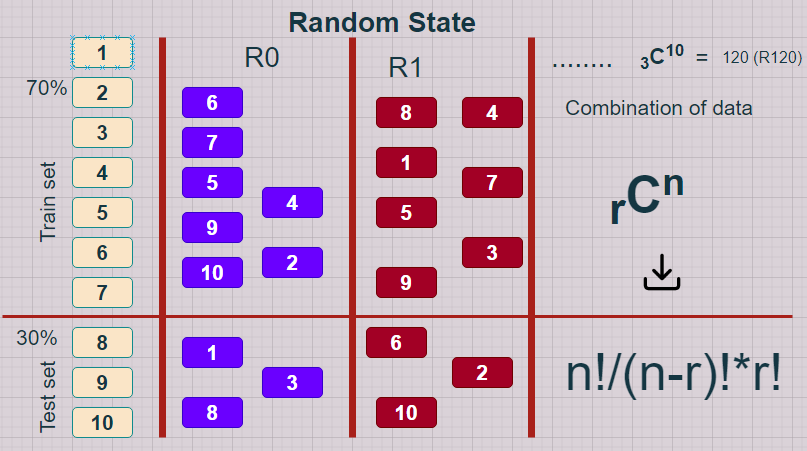

In [ ]:
from math import comb

print(f'Jumlah Kombinasi: {comb(350,150)}')

Jumlah Kombinasi: 2742787523526520418053171313242525834156826530151331921657600692192115838750139730652989654006510663378


Stratifikasi mempertahankan proporsi bagaimana data didistribusikan di kolom target (y) dan menggambarkan proporsi distribusi yang sama di train_test_split. Ambil contoh, jika masalahnya adalah masalah klasifikasi biner, dan kolom target (y) memiliki proporsi 80% = ya, dan 20% = tidak (jumlah frekuensi label tidak seimbang). Karena ada 4 kali lebih banyak 'ya' daripada 'tidak' di kolom target (y), jika membagi menjadi y_train dan y_test tanpa stratifikasi, kita mungkin akan mengalami kesulitan karena kebanyakan nilai 'ya' yang akan masuk dalam set train, dan nilai 'tidak' akan masuk dalam set test. (ada kemungkinan, set train tidak memiliki nilai 'tidak')

Oleh karena itu dengan Stratifikasi, kolom target untuk set pelatihan memiliki 80% 'ya' dan 20% 'tidak', dan juga, kolom target untuk set tes masing-masing memiliki 80% 'ya' dan 20% dari 'tidak'.

Stratify membuat pemerataan target (label) di set training dan testing yang didistribusikan dari set data asli.

In [ ]:
import numpy as np

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 71, 1: 129}

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 54, 1: 96}

In [ ]:
print(f'Proporsi data train class good: {(129/225*100):.0f}%')
print(f'Proporsi data test class good: {(96/225*100):.0f}%\n')

print(f'Proporsi data train class bad: {(71/125*100):.0f}%')
print(f'Proporsi data test class bad: {(54/125*100):.0f}%')

Proporsi data train class good: 57%
Proporsi data test class good: 43%

Proporsi data train class bad: 57%
Proporsi data test class bad: 43%


In [ ]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(random_state=894, class_weight='balanced')
per_clf.fit(X_train, y_train)

Perceptron(class_weight='balanced', random_state=894)

Fungsi aktivasi linier, juga dikenal sebagai "tidak ada aktivasi", atau "fungsi identitas" (dikalikan x1.0), adalah di mana aktivasi sebanding dengan input. Fungsi tidak melakukan apa pun terhadap jumlah bobot masukan, ia hanya mengeluarkan nilai yang diberikan.

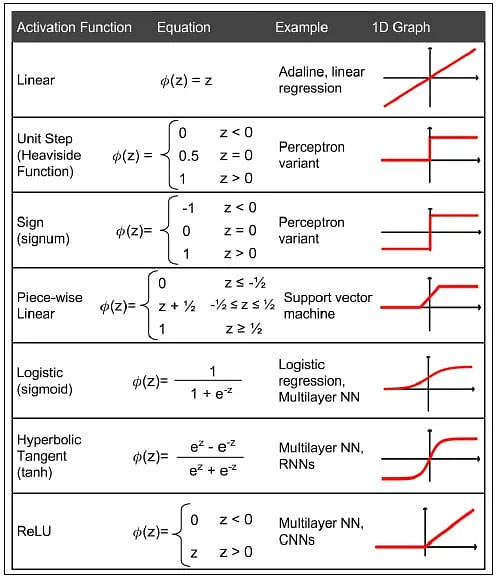

Class weight seimbang adalah salah satu metode yang banyak digunakan untuk model klasifikasi tidak seimbang. Ini memodifikasi bobot kelas dari kelas mayoritas dan minoritas selama proses pelatihan model untuk mencapai hasil model yang lebih baik.

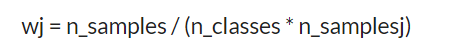

In [ ]:
n_samples = 350 #jumlah data
n_classes = 2 #bad & good
n_sample_0 = 125 #jumlah bad
n_sample_1 = 225 #jumlah good

w0 = n_samples/(n_classes*n_sample_0)
w1 = n_samples/(n_classes*n_sample_1)

print(f'Bobot untuk kelas bad: {w0}')
print(f'Bobot untuk kelas good: {w1:.2f}')

Bobot untuk kelas bad: 1.4
Bobot untuk kelas good: 0.78


Ini membuatnya lebih jelas bahwa class_weight = 'balanced' membantu dalam memberikan bobot yang lebih tinggi kepada kelas minoritas dan bobot yang lebih rendah kepada kelas mayoritas.

## Matrik Akurasi

In [ ]:
print(f'Akurasi datatrain: {per_clf.score(X_train, y_train)*100}%')

Akurasi datatrain: 90.5%


In [ ]:
print(f'Akurasi datatest: {per_clf.score(X_test, y_test)*100}%')

Akurasi datatest: 96.0%


In [ ]:
y_pred = per_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print(f'Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%')

Accuracy Score: 96.00%


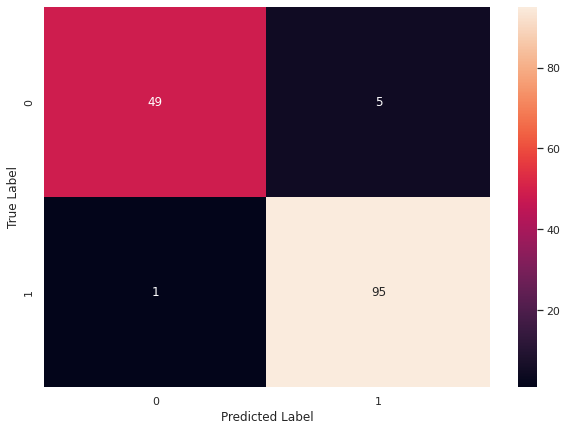

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cf_matrix)
plt.figure(figsize=(10,7))
sns.set(font_scale=1)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

In [ ]:
from sklearn.metrics import f1_score

print(f'F1 Score: {f1_score(y_test, y_pred)*100:.2f}%')

F1 Score: 96.94%


##Tuning

In [ ]:
from sklearn.model_selection import train_test_split

id = []
jd = []
acc = []

for i in range(0, 1000):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=150, random_state=i, stratify=y)

  for j in range(0, 1000):
    from sklearn.linear_model import Perceptron

    per_clf = Perceptron(random_state=j, class_weight='balanced')
    per_clf.fit(X_train, y_train)

    y_pred = per_clf.predict(X_test)
    from sklearn.metrics import accuracy_score

    id.append(i)
    jd.append(j)
    acc.append(accuracy_score(y_test, y_pred))
  
print(f'Accuracy: {max(acc)} %')

In [ ]:
print('index:', np.argmax(acc),
      '\nrandom_state train_test_split: ', id[np.argmax(acc)], 
      '\nrandom_state perceptron: ', jd[np.argmax(acc)])